# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

# Importing MainDataframe

In [2]:
main_df = pd.read_csv('/content/drive/MyDrive/ Uga Dooga LLC/us events ad_revenue filtered 03.02-07.02.csv')
main_df.shape

(860079, 16)

# Content of main_df

In [3]:
main_df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


#Creating df from specidic columns of main_df

In [6]:
df = main_df[['profile_id', 'os_version', 'device_manufacturer', 'device_model', 'device_type',
         'event_json', 'event_receive_datetime', 'city']].copy()

In [7]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,event_json,event_receive_datetime,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:58:19,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:58:19,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 16:59:29,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:24,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:16,NaN


#Content of events_json

In [177]:
json.loads(df['event_json'][0])

{'ad_country_code': 'US',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'ad_type': 'banner',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ads_ltv': 0.487876676518837,
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ',
 'cur_ticks': 637795729492245130,
 'currency': 'USD',
 'ecpm_sma': 0.511508107185364,
 'network_name': 'Google AdMob',
 'normalized_ecpm_sma': 0.511508107185364,
 'placement': '',
 'revenue': 0.000510313,
 'session_length': 705.8807,
 'session_view_index': 0,
 'value': 0.000510313,
 'view_index': 1}

# Exracting add_type, placement, view_index, revenue, ads_ltv and network_name from event_json

In [180]:
events = ['ad_type', 'view_index', 'revenue', 'ecpm_sma', 'ads_ltv', 'network_name']
events_vals = [pd.json_normalize(json.loads(df['event_json'][i]))[events].values[0] for i in range(len(df))]
events_df = pd.DataFrame(events_vals, columns=events)

In [187]:
df_all = pd.concat([df, events_df], axis = 1)
df_all.drop(columns =['event_json'], axis=1, inplace=True)

In [188]:
df_all.to_csv("/content/drive/MyDrive/ Uga Dooga LLC/data_prepared.csv")
df_all.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,event_receive_datetime,city,ad_type,view_index,revenue,ecpm_sma,ads_ltv,network_name
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511508,0.487877,Google AdMob
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511389,0.488387,Google AdMob
2,JLkVacrzHY6,11,Google,Pixel 2,phone,2022-02-06 16:59:29,Charlotte,banner,1,0.002386,0.928597,0.678479,APPLOVIN_EXCHANGE
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,2022-02-06 17:09:24,Cocoa,int,1,0.013894,13.782633,0.013894,AppLovin
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,2022-02-06 17:16:16,NaN,banner,1,0.006828,1.660282,0.060571,Google AdMob


In [4]:
df_all = pd.read_csv('/content/drive/MyDrive/ Uga Dooga LLC/data_prepared.csv')

## Counting missing values in each column

In [5]:
for name in df_all.columns:
  print(name, df_all[name].isna().sum())

Unnamed: 0 0
profile_id 14
os_version 0
device_manufacturer 0
device_model 0
device_type 0
event_receive_datetime 0
city 323708
ad_type 0
view_index 0
revenue 0
ecpm_sma 0
ads_ltv 0
network_name 0


###37.6% of the data are missing city

## Dropping all missing values

In [6]:
df_all.dropna(axis='rows', inplace=True)
len(df_all)

536371

In [5]:
df_all.head()

,Unnamed: 0,profile_id,os_version,device_manufacturer,device_model,device_type,event_receive_datetime,city,ad_type,view_index,revenue,ecpm_sma,ads_ltv,network_name
0,0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511508,0.487877,Google AdMob
1,1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511389,0.488387,Google AdMob
2,2,JLkVacrzHY6,11,Google,Pixel 2,phone,2022-02-06 16:59:29,Charlotte,banner,1,0.002386,0.928597,0.678479,APPLOVIN_EXCHANGE
3,3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,2022-02-06 17:09:24,Cocoa,int,1,0.013894,13.782633,0.013894,AppLovin
21,21,JLedYyW6E8X,11,Samsung,Galaxy A51 5G,phone,2022-02-06 23:03:58,Columbus,banner,1,0.002000,2.574222,0.185721,Google AdMob


# Question 1

## 1a) Build distribution of average eCPMs of users

In [13]:
def ad_type_graph(add, plot, n=100):
  data = df_all[df_all['ad_type'] == add]
  s = data['ecpm_sma'].std()
  m = data['ecpm_sma'].mean()
  r = np.linspace(0, m+s, n+1)
  bin = []
  for i in range(n-1):
    up = data[data['ecpm_sma'] > r[i]]
    down = up[up['ecpm_sma'] <= r[i+1]]
    bin.append(len(down))

  for i in range(len(r[:-2])):
    plot.vlines(r[i],ymin=0,ymax=bin[i])
  plot.set_title(f'ECPM distribution of {add}')
  plot.set_xlabel('ECPM')
  plot.set_ylabel('Count')
  print(f"{add} - {round(m,3)}, {round(s, 3)}, {round(r[bin.index(max(bin))], 3)}, {round(data['ecpm_sma'].sum())}")

int - 42.663, 48.071, 11.795, 1016145
banner - 0.77, 1.282, 0.492, 391269
rv - 72.67, 81.829, 27.81, 316987


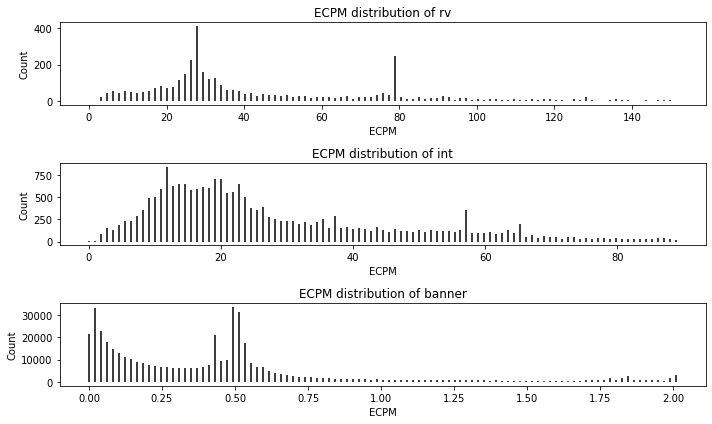

In [14]:
plt.figure(figsize=(10, 6))

plot1 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot2 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot3 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
 
# Graphs
ad_type_graph('int', plot1)
ad_type_graph('banner', plot2)
ad_type_graph('rv', plot3)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

## 1b) Distribution of average ECPM

In [35]:
def ad_type_graph_ecpm(add, attr, plot):
  data = df_all[df_all['ad_type'] == add]
  name = data[attr].value_counts().index
  users_count = data[attr].value_counts().values
  avg_ecpm = [data['ecpm_sma'][data[attr] == i].mean() for i in name]

  print(f'Top 5 {attr} by ECPM {add} {list(name[:5])}')

  
  plot.bar([i*5 for i in range(len(name))], avg_ecpm, width= 2)
  plot.hlines(sum(avg_ecpm)/len(avg_ecpm), xmin=0, xmax=max([i*5 for i in range(len(name))]))
  plot.set_title(f'Distribution of {add.upper()} ECPM by {attr}')
  plot.set_xticks([])
  plot.set_ylabel('Average ECPM')
  plot.set_xlabel('City')


Top 5 city by ECPM int ['Minneapolis', 'New York', 'Charlotte', 'Houston', 'Springfield']
Top 5 city by ECPM banner ['New York', 'Minneapolis', 'Springfield', 'Houston', 'Charlotte']
Top 5 city by ECPM rv ['Minneapolis', 'Paducah', 'New York', 'Robinson', 'Houston']


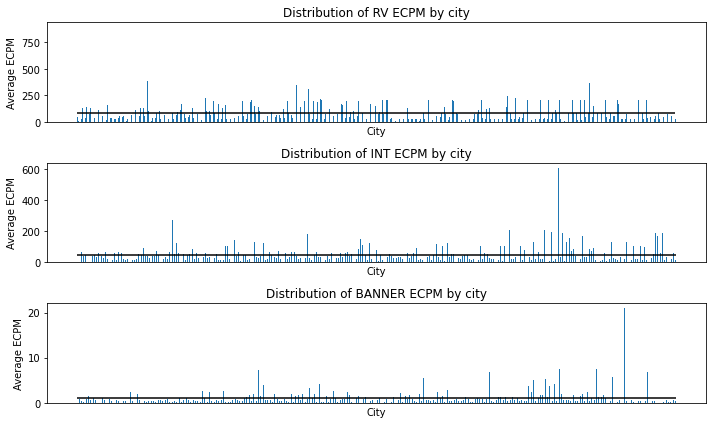

In [36]:
plt.figure(figsize=(10, 6))

plot1 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot2 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot3 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
 
# Graphs
ad_type_graph_ecpm('int', 'city', plot1)
ad_type_graph_ecpm('banner', 'city', plot2)
ad_type_graph_ecpm('rv', 'city', plot3)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

In [26]:
def ad_type_graph_ecpm_count(add, attr, plot):
  data = df_all[df_all['ad_type'] == add]
  name = data[attr].value_counts().index
  users_count = data[attr].value_counts().values
  avg_ecpm = [data['ecpm_sma'][data[attr] == i].mean() for i in name]
  print(f'Top 5 cities {add} {list(name[:5])}')
  
  plot.bar([i*5 for i in range(len(name))], users_count, width= 2)
  plot.hlines(sum(avg_ecpm)/len(avg_ecpm), xmin=0, xmax=max([i*5 for i in range(len(name))]))
  plot.set_title(f'Distribution of {add.upper()} users by {attr}')
  plot.set_xticks([])
  plot.set_ylabel('Users')
  plot.set_xlabel('City')

Top 5 cities int ['Minneapolis', 'New York', 'Charlotte', 'Houston', 'Springfield']
Top 5 cities banner ['New York', 'Minneapolis', 'Springfield', 'Houston', 'Charlotte']
Top 5 cities rv ['Minneapolis', 'Paducah', 'New York', 'Robinson', 'Houston']


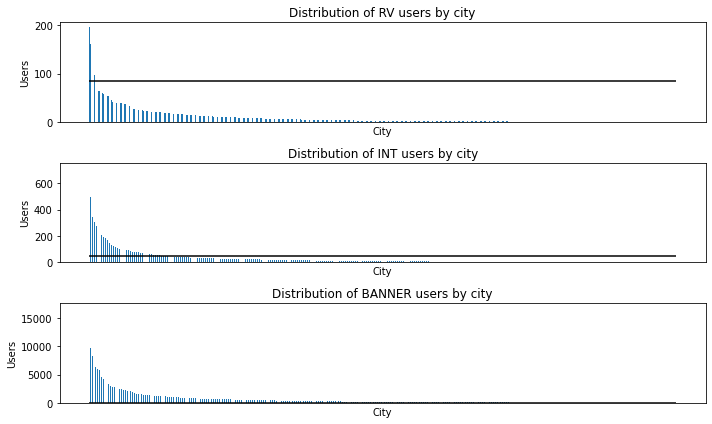

In [27]:
plt.figure(figsize=(10, 6))

plot1 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot2 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot3 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
 
# Graphs
ad_type_graph_ecpm_count('int', 'city', plot1)
ad_type_graph_ecpm_count('banner', 'city', plot2)
ad_type_graph_ecpm_count('rv', 'city', plot3)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

### Distribution of average ECPM in different cities 

Top 5 os_version by ECPM int ['12', '11', '10', '9', '8.0.0']
Top 5 os_version by ECPM banner ['12', '11', '10', '9', '8.0.0']
Top 5 os_version by ECPM rv ['12', '11', '10', '9', '8.0.0']


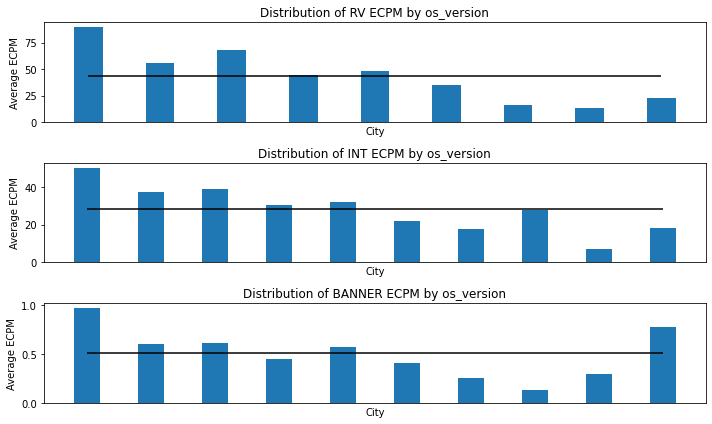

In [37]:
plt.figure(figsize=(10, 6))

plot1 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot2 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot3 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
 
# Graphs
ad_type_graph_ecpm('int', 'os_version', plot1)
ad_type_graph_ecpm('banner', 'os_version', plot2)
ad_type_graph_ecpm('rv', 'os_version', plot3)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

## 1c) Distribution of average Revenue

In [71]:
def ad_type_graph_revenue(add, attr, plot):
  data = df_all[df_all['ad_type'] == add]
  name = data[attr].value_counts().index
  users_count = data[attr].value_counts().values
  avg_ecpm = [data['revenue'][data[attr] == i].mean() for i in name]
  
  plot.bar([i*5 for i in range(len(name))], avg_ecpm, width= 2)
  plot.hlines(sum(avg_ecpm)/len(avg_ecpm), xmin=0, xmax=max([i*5 for i in range(len(name))]))
  plot.set_title(f'Distribution of {add.upper()} Revenue by {attr}')
  plot.set_xticks([])
  plot.set_ylabel('Average ECPM')
  plot.set_xlabel('City')

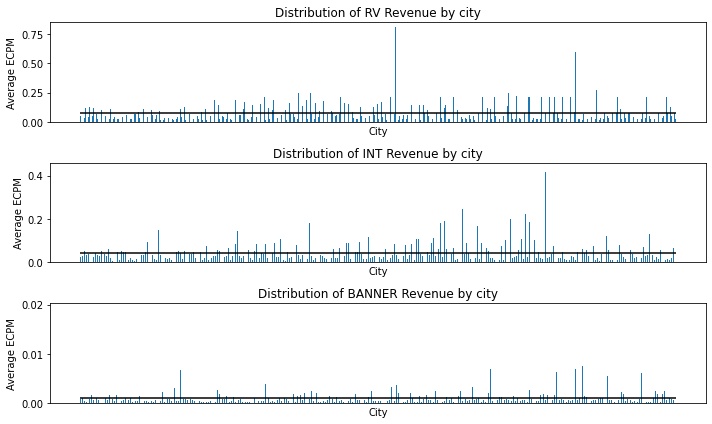

In [72]:
plt.figure(figsize=(10, 6))

plot1 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot2 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot3 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
 
# Graphs
ad_type_graph_revenue('int', 'city', plot1)
ad_type_graph_revenue('banner', 'city', plot2)
ad_type_graph_revenue('rv', 'city', plot3)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

### Distribution of average Revenue by OS 

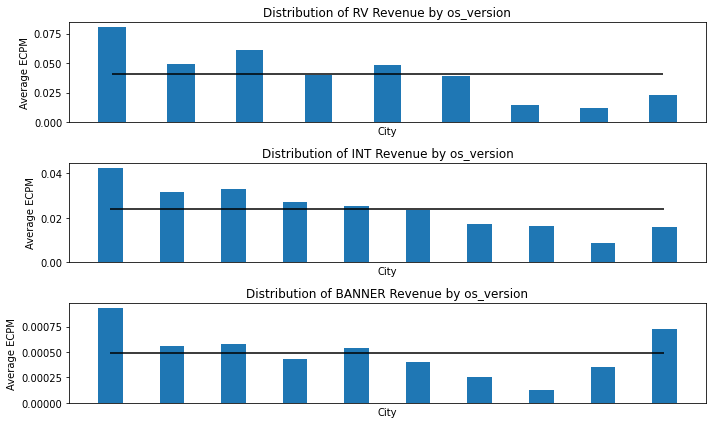

In [73]:
plt.figure(figsize=(10, 6))

plot1 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
plot2 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plot3 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
 
# Graphs
ad_type_graph_revenue('int', 'os_version', plot1)
ad_type_graph_revenue('banner', 'os_version', plot2)
ad_type_graph_revenue('rv', 'os_version', plot3)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

# Question 2

##Take into account statistical significance (display, filter out insignificant, or at least comment). Explain the solution.

### Does mean in ecpm represent population means

In [75]:
m_all = df_all['ecpm_sma'].mean()
m_banner = df_all['ecpm_sma'][df_all['ad_type'] == 'banner'].mean()
m_int = df_all['ecpm_sma'][df_all['ad_type'] == 'int'].mean()
m_rv = df_all['ecpm_sma'][df_all['ad_type'] == 'rv'].mean()

print(f"Mean of all sample - {round(m_all, 5)}")
print(f"Mean of banner - {round(m_banner, 5)}")
print(f"Mean of int - {round(m_int, 5)}")
print(f"Mean of rv - {round(m_rv, 5)}")

Mean of all sample - 3.21494
Mean of banner - 0.76993
Mean of int - 42.66291
Mean of rv - 72.67


In [78]:
se_all = df_all['ecpm_sma'].std()/np.sqrt(m_all)
se_banner = df_all['ecpm_sma'][df_all['ad_type'] == 'banner'].std()/np.sqrt(m_banner)
se_int = df_all['ecpm_sma'][df_all['ad_type'] == 'int'].std()/np.sqrt(m_int)
se_rv = df_all['ecpm_sma'][df_all['ad_type'] == 'rv'].std()/np.sqrt(m_rv)

print(f"SE of all sample - {round(se_all, 5)}")
print(f"SE of banner - {round(se_banner, 5)}")
print(f"SE of int - {round(se_int, 5)}")
print(f"SE of rv - {round(se_rv, 5)}")

SE of all sample - 9.20831
SE of banner - 1.46075
SE of int - 7.35964
SE of rv - 9.59904


### 95% confidence interval


In [80]:
print(f'Interval for all - [{m_all + se_all*1.96}, {m_all - se_all*1.96}] ')
print(f'Interval for banner - [{m_banner + se_banner*1.96}, {m_banner - se_banner*1.96}] ')
print(f'Interval for int - [{m_int + se_int*1.96}, {m_int - se_int*1.96}] ')
print(f'Interval for all - [{m_rv + se_rv*1.96}, {m_rv - se_rv*1.96}] ')

Interval for all - [21.263230935449762, -14.833349803177851] 
Interval for banner - [3.6329861584657523, -2.0931352322984793] 
Interval for int - [57.087809614700866, 28.238008503258918] 
Interval for all - [91.48410945434355, 53.85588477866412] 


#### With 95% confidence we ca say that the actual mean of the population lays within given ranges

# Question 3



*   Rv is the least used type add, yet it is the most profitable one (1 million). It is distributed nearly normal around the mean of 27.8.
*  Int add type looks like a right skewed graph that also resembles normal distribution around mean of 42.6 with standard deviation of 11.8. Total ECPM of int add is around 320 thousand.
*  Banner is the most used type of add yet it is least profitable, but despite this fact it brings more than int (390 thousand). Its graph doesn’t look like normal distribution graph but the mean ECPM here is 0.77 with standard deviation of 1.3




* Cities with the most users are Minneapolis, New York, Charlotte, Houston, Springfield and they show highest ECMP's in every add type

* Almost the same situation with OS, here we can observe that ECPM of newer OS version are prevailing over older ones

#Finding Correlations

## ECPM VS Time of the Day

In [38]:
df_all.head()

,Unnamed: 0,profile_id,os_version,device_manufacturer,device_model,device_type,event_receive_datetime,city,ad_type,view_index,revenue,ecpm_sma,ads_ltv,network_name
0,0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511508,0.487877,Google AdMob
1,1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511389,0.488387,Google AdMob
2,2,JLkVacrzHY6,11,Google,Pixel 2,phone,2022-02-06 16:59:29,Charlotte,banner,1,0.002386,0.928597,0.678479,APPLOVIN_EXCHANGE
3,3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,2022-02-06 17:09:24,Cocoa,int,1,0.013894,13.782633,0.013894,AppLovin
21,21,JLedYyW6E8X,11,Samsung,Galaxy A51 5G,phone,2022-02-06 23:03:58,Columbus,banner,1,0.002000,2.574222,0.185721,Google AdMob


In [64]:
def hour_converter(x):
    return float(x[11:16].replace(':','.'))
def minute_converter(x):
    return int(x[11:13])

In [105]:
df_all['minutes'] = df_all['event_receive_datetime'].apply(hour_converter)
df_all['hours'] = df_all['event_receive_datetime'].apply(minute_converter)

In [106]:
df_all.head()

,Unnamed: 0,profile_id,os_version,device_manufacturer,device_model,device_type,event_receive_datetime,city,ad_type,view_index,revenue,ecpm_sma,ads_ltv,network_name,hours,minutes,minute,hour
0,0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511508,0.487877,Google AdMob,17,17.58,17.58,17
1,1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,2022-02-06 17:58:19,Norwalk,banner,1,0.000510,0.511389,0.488387,Google AdMob,17,17.58,17.58,17
2,2,JLkVacrzHY6,11,Google,Pixel 2,phone,2022-02-06 16:59:29,Charlotte,banner,1,0.002386,0.928597,0.678479,APPLOVIN_EXCHANGE,16,16.59,16.59,16
3,3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,2022-02-06 17:09:24,Cocoa,int,1,0.013894,13.782633,0.013894,AppLovin,17,17.09,17.09,17
21,21,JLedYyW6E8X,11,Samsung,Galaxy A51 5G,phone,2022-02-06 23:03:58,Columbus,banner,1,0.002000,2.574222,0.185721,Google AdMob,23,23.03,23.03,23


### Average ECPM in a Day

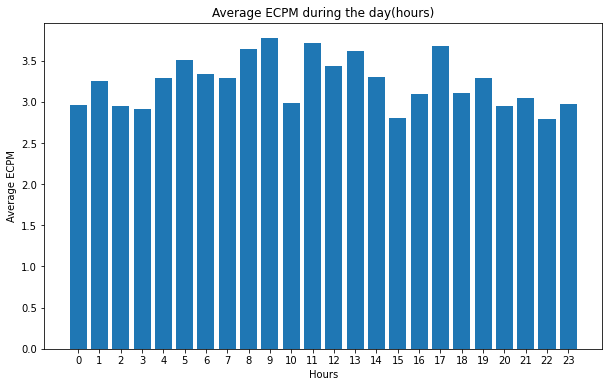

In [119]:
hours_ecpm = [i for i in range(24)]
avg_ecpm_h = [df_all['ecpm_sma'][df_all['hour'] == i].mean() for i in hours_ecpm] 

plt.figure(figsize=(10,6))
plt.bar(hours_ecpm, avg_ecpm_h, align='center')
plt.title('Average ECPM during the day(hours)')
plt.xlabel('Hours')
plt.ylabel('Average ECPM')
plt.xticks(hours_ecpm, hours_ecpm)
plt.show()

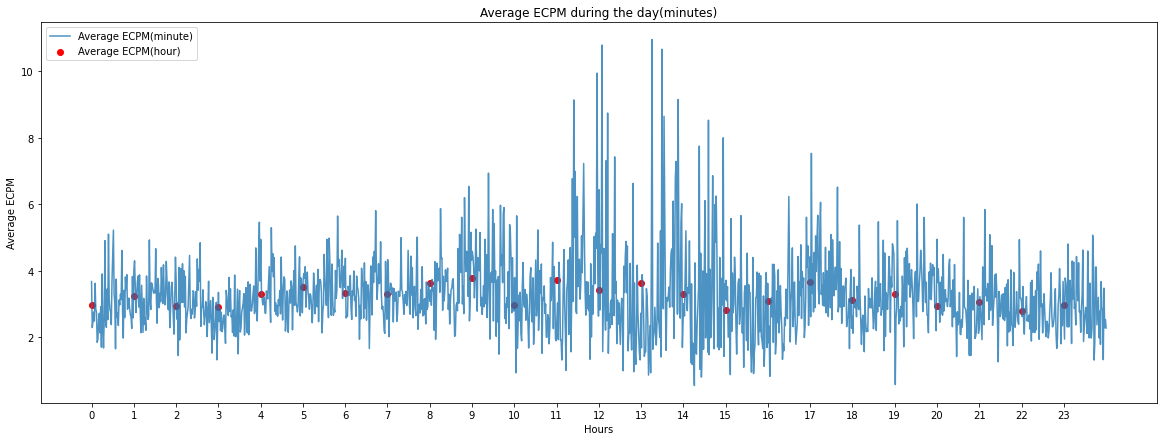

In [128]:
minutes = list(df_all['minutes'].value_counts().index)
minutes_s = sorted(minutes)
avg_ecpm_m = [df_all['ecpm_sma'][df_all['minutes'] == i].mean() for i in minutes_s] 

plt.figure(figsize=(20,7))
plt.plot(np.linspace(0,24, len(minutes_s)), avg_ecpm_m, alpha =0.8, label='Average ECPM(minute)')
plt.scatter(hours_ecpm, avg_ecpm_h, color='red', label='Average ECPM(hour)')
plt.title('Average ECPM during the day(minutes)')
plt.xlabel('Hours')
plt.ylabel('Average ECPM')
plt.legend(loc='upper left')
plt.xticks(hours_ecpm, hours_ecpm)
plt.show()

### Count of users in specific

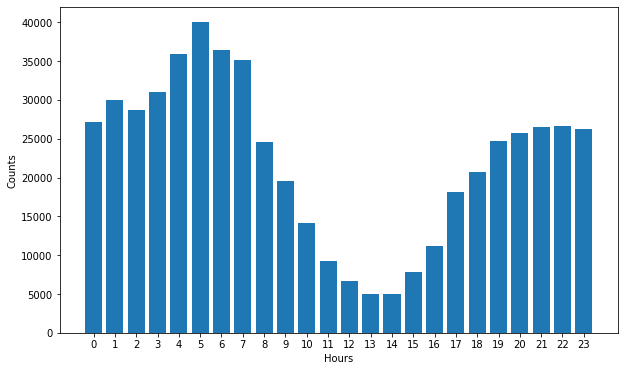

In [69]:
df_all['minutes'] = df_all['event_receive_datetime'].apply(hour_converter)
df_all['hours'] = df_all['event_receive_datetime'].apply(minute_converter)
hours = list(df_all['hours'].value_counts().index)
counts = list(df_all['hours'].value_counts().values)

plt.figure(figsize=(10,6))
plt.bar(hours, counts, align='center')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.xticks(hours, hours)
plt.show()

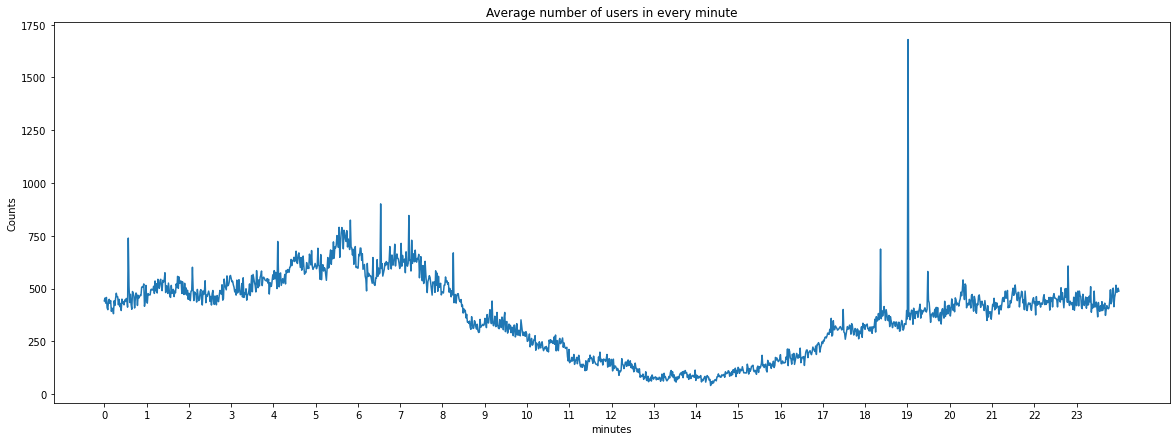

In [97]:
minutes = list(df_all['minutes'].value_counts().index)
counts = list(df_all['minutes'].value_counts().values)

minutes_s = sorted(minutes)
counts_s = [counts[minutes.index(i)] for i in minutes_s]

plt.figure(figsize=(20,7))
plt.title('Average number of users in every minute')
plt.plot(np.linspace(0,24, len(minutes_s)), counts_s)
plt.xlabel('minutes')
plt.ylabel('Counts')
plt.xticks(hours, hours)
plt.show()

If we look into the average hourly ECPM we can see that number does not change too much. However if we look into every minute of the days then we can see that there are big fluctuations. 